# Load and plot RMSE's

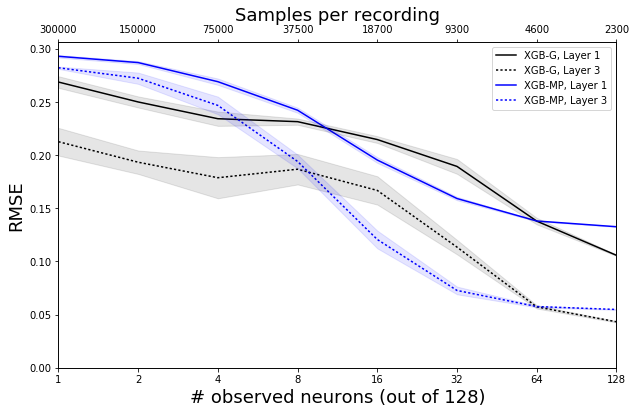

In [7]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = 'figures/RMSEs_XGB_vs_XGBMP'
x = [2**x for x in range(8)]
x = range(len(x))
fig = pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, len(x)-1])
ax2 = ax1.twiny()


networks =['NN']
layers =[0,1,2,3]
nRecordings =10
methods =['XGB', 'XGBMP']
methodLabels =['XGB-G', 'XGB-MP']
lstyles =['-',  '--', ':']
colors =['k', 'b', 'r', 'g', 'm', 'c']

for iMethod in range(len(methods)):
    for iNetwork in range(len(networks)):
        for iLayer in range(0,len(layers), 2):
            fName = 'results/' + methods[iMethod] + '_RMSES_Layer' + str(iLayer) + 'nRec' + \
                    str(nRecordings) + networks[iNetwork] + '.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.mean(rmses, axis=1), axis=0)
            error = np.std(np.mean(rmses, axis=1), axis=0)
            ax1.plot(x, y, label=methodLabels[iMethod]+', Layer '+ str(iLayer+1), 
                     color=colors[iMethod],linestyle=lstyles[iLayer])
            pl.fill_between(x, y-error, y+error, alpha=0.1, color  = colors[iMethod] )


legend = ax1.legend(loc='upper right', shadow=False)
ax1.set_xlabel('# observed neurons (out of 128)', fontsize=18)
ax2.set_xlabel('Samples per recording',  fontsize=18)


ax2.set_xlim(ax1.get_xlim())
ax1.set_xticklabels( [2**x for x in range(8)])
nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(8)])*100

ax2.set_xticklabels(nSamples)
ax1.set_ylabel('RMSE', fontsize=18)
yl = ax1.get_ylim()
ax1.set_ylim([0, yl[1]])
#ax1.set_ylim([0, .5])

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)


In [39]:
fName

'results/XGB_RMSES_Layer0nRec10NN.dat'

In [11]:
with open(fName,'rb') as f:
    rmses = pickle.load(f)
f.close()
rmses

array([[[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]])